In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn import metrics


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
price_house = pd.read_csv('..\\02_Ouput\\historico_madrid_limpio.csv')

In [4]:
price_house.shape

(76241, 19)

In [5]:
#añado una columna para poder tener el año y poder separar el dataset

price_house["year"] = pd.to_datetime(price_house["Fecha"],format="%Y-%m-%d").dt.year

In [6]:
# Hold-out. Separo los datos de entrenamiento y test por fechas. Es lo más lógico para datos temporales
train = price_house[price_house["Fecha"]<"2018"]
test = price_house[price_house["Fecha"]>="2018"]

In [7]:
#leemos train y eliminamos las columnas que se han creado anteriormente
train.columns.values
train.drop(['Unnamed: 0'], axis='columns', inplace=True)
train.head()

C:\Users\Lor\Anaconda\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Fecha,year,price,postal_code,cod_distrito,year_distrito,size,bedrooms,bathrooms,price_m2,lift,swimming_pool,garden,sports,status,air_conditioning,construction_year,exterior
0,2002-11-14,2002,138232.0,28011,10,102002,70.0,2,1,1974.7429,1,0,0,0,2,0,1972,0
1,2003-01-22,2003,195349.0,28041,12,122003,84.0,2,2,2325.5833,1,1,1,1,2,0,1999,0
2,2003-02-21,2003,140740.0,28030,14,142003,60.0,3,1,2345.6667,1,0,0,0,2,0,1973,0
3,2003-03-10,2003,167000.0,28011,10,102003,60.5,2,1,2760.3306,1,0,0,0,2,0,1965,0
4,2003-03-10,2003,165000.0,28011,10,102003,77.1,3,1,2140.0778,1,0,0,0,2,0,1980,0


In [8]:
train.head()

,Fecha,year,price,postal_code,cod_distrito,year_distrito,size,bedrooms,bathrooms,price_m2,lift,swimming_pool,garden,sports,status,air_conditioning,construction_year,exterior
0,2002-11-14,2002,138232.0,28011,10,102002,70.0,2,1,1974.7429,1,0,0,0,2,0,1972,0
1,2003-01-22,2003,195349.0,28041,12,122003,84.0,2,2,2325.5833,1,1,1,1,2,0,1999,0
2,2003-02-21,2003,140740.0,28030,14,142003,60.0,3,1,2345.6667,1,0,0,0,2,0,1973,0
3,2003-03-10,2003,167000.0,28011,10,102003,60.5,2,1,2760.3306,1,0,0,0,2,0,1965,0
4,2003-03-10,2003,165000.0,28011,10,102003,77.1,3,1,2140.0778,1,0,0,0,2,0,1980,0


In [9]:
test.head()

,Unnamed: 0,Fecha,year,price,postal_code,cod_distrito,year_distrito,size,bedrooms,bathrooms,price_m2,lift,swimming_pool,garden,sports,status,air_conditioning,construction_year,exterior
57619,57620,2018-01-02,2018,77000.30,28018,13,132018,65.0,2,1,1184.6200,0,0,0,0,2,0,1962,0
57620,57621,2018-01-02,2018,78500.06,28025,11,112018,62.0,3,1,1266.1300,0,0,0,0,2,0,1965,0
57621,57622,2018-01-02,2018,78750.00,28025,11,112018,60.0,3,1,1312.5000,0,0,0,0,2,0,1960,0
57622,57623,2018-01-02,2018,310000.00,28019,11,112018,122.0,3,2,2540.9836,1,0,0,0,2,0,2005,0
57623,57624,2018-01-02,2018,615999.00,28050,16,162018,300.0,5,4,2053.3300,0,0,0,0,2,0,2003,0


In [10]:
#leemos train y eliminamos las columnas que se han creado anteriormente
test.columns.values
test.drop(['Unnamed: 0'], axis='columns', inplace=True)
test.head()

C:\Users\Lor\Anaconda\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Fecha,year,price,postal_code,cod_distrito,year_distrito,size,bedrooms,bathrooms,price_m2,lift,swimming_pool,garden,sports,status,air_conditioning,construction_year,exterior
57619,2018-01-02,2018,77000.30,28018,13,132018,65.0,2,1,1184.6200,0,0,0,0,2,0,1962,0
57620,2018-01-02,2018,78500.06,28025,11,112018,62.0,3,1,1266.1300,0,0,0,0,2,0,1965,0
57621,2018-01-02,2018,78750.00,28025,11,112018,60.0,3,1,1312.5000,0,0,0,0,2,0,1960,0
57622,2018-01-02,2018,310000.00,28019,11,112018,122.0,3,2,2540.9836,1,0,0,0,2,0,2005,0
57623,2018-01-02,2018,615999.00,28050,16,162018,300.0,5,4,2053.3300,0,0,0,0,2,0,2003,0


In [11]:
#test tiene muchos menos datos porque lo hemos separado por tiempo. Test es datos > 2018

train.shape, test.shape

((58995, 18), (17246, 18))

In [12]:
#para ver los nombres de las columnas

train.columns.values

array(['Fecha', 'year', 'price', 'postal_code', 'cod_distrito',
       'year_distrito', 'size', 'bedrooms', 'bathrooms', 'price_m2',
       'lift', 'swimming_pool', 'garden', 'sports', 'status',
       'air_conditioning', 'construction_year', 'exterior'], dtype=object)

In [13]:
train.describe()

,year,price,postal_code,cod_distrito,year_distrito,size,bedrooms,bathrooms,price_m2,lift,swimming_pool,garden,sports,status,air_conditioning,construction_year,exterior
count,58995.000000,5.899500e+04,58995.000000,58995.000000,58995.000000,58995.000000,58995.000000,58995.000000,58995.000000,58995.000000,58995.000000,58995.000000,58995.000000,58995.000000,58995.000000,58995.000000,58995.000000
mean,2013.707738,3.112192e+05,28026.188728,10.272328,104736.989372,100.699778,2.705094,1.610035,2831.348846,0.560810,0.181456,0.210679,0.090584,2.103026,0.022951,1970.718807,0.122756
std,2.833740,2.790497e+05,14.880290,5.739288,57392.833983,48.555095,0.966988,0.733758,1433.946168,0.496293,0.385399,0.407794,0.287019,0.390365,0.149749,55.664456,0.328160
min,2002.000000,3.125000e+04,28001.000000,1.000000,12005.000000,50.000000,1.000000,1.000000,345.670000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2011.000000,1.304998e+05,28014.000000,5.000000,52015.000000,67.000000,2.000000,1.000000,1766.467550,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1960.000000,0.000000
50%,2014.000000,2.320000e+05,28026.000000,10.000000,102017.000000,86.000000,3.000000,1.000000,2660.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1970.000000,0.000000
75%,2016.000000,3.850000e+05,28038.000000,15.000000,152014.000000,116.000000,3.000000,2.000000,3606.289750,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1998.000000,0.000000
max,2017.000000,3.372501e+06,28055.000000,21.000000,212017.000000,300.000000,10.000000,7.000000,14850.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,2017.000000,1.000000


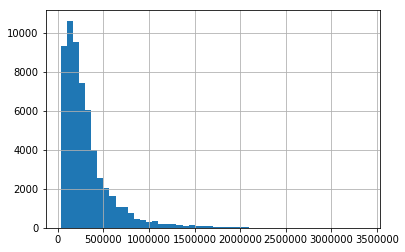

In [14]:
#de la visualización del histograma podemos ver que hay muchos outliers. Es normal porque hay zonas con viviendas con valores extremos
train['price'].hist(bins = 50)

Como vemos los precios están alineados a la izquierda. Para quitar el sesgo hacemos el logaritmo

### Como hemos visto antes los precios están alineados a la izquierda por lo que podemos decir que están sesgados. Vamos a transformarlo en logaritmicos para quitar el sesgo.


In [15]:
#reseteamos el índice
train.reset_index(drop=True, inplace=True)
train["price"] = np.log1p(train["price"])
y = train['price'].reset_index(drop=True)

C:\Users\Lor\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
#vamos a convertir también en logaritmico los precios de test para luego poder compararar con la predicción
test.reset_index(drop=True, inplace=True)
test["price"] = np.log1p(test["price"])
y_t = test['price'].reset_index(drop=True)

C:\Users\Lor\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Después de convertirlos en logaritmicos ahora podemos ver que nuestros precios están centrados, más balanceados

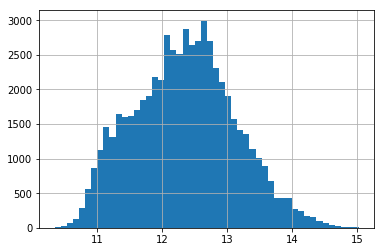

In [17]:
train['price'].hist(bins = 50)

## Vamos a ver la relación entre superficie y unitario

(0, 20000)

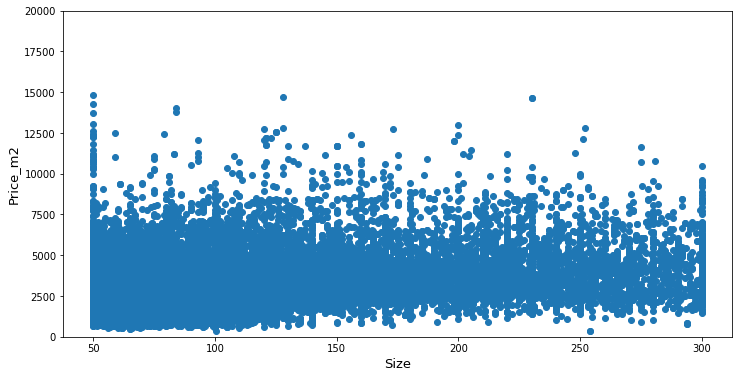

In [18]:
plt.figure(figsize=(12,6))
plt.scatter(x=train['size'], y=train['price_m2'])
plt.xlabel("Size", fontsize=13)
plt.ylabel("Price_m2", fontsize=13)
plt.ylim(0,20000)

## Vemos la correlacion entre variables

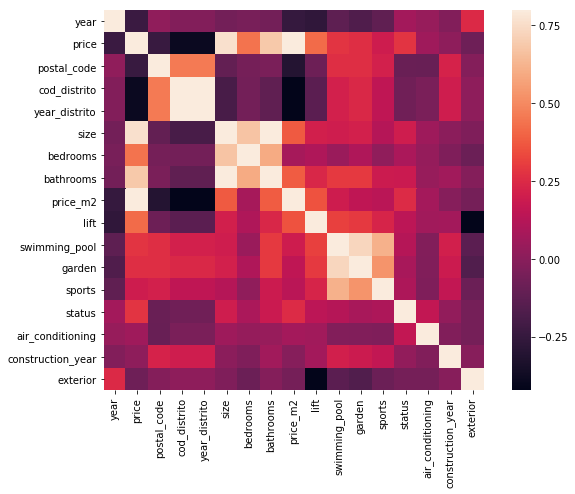

In [19]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(10,7))
sns.heatmap(corrmat, vmax=.8, square=True);

In [20]:
price_house.corr()

,Unnamed: 0,year,price,postal_code,cod_distrito,year_distrito,size,bedrooms,bathrooms,price_m2,lift,swimming_pool,garden,sports,status,air_conditioning,construction_year,exterior
Unnamed: 0,1.000000,0.905959,-0.026362,0.080517,0.027414,0.027463,-0.044510,-0.064623,-0.022774,-0.010610,-0.203497,-0.065844,-0.093861,-0.069452,0.054574,0.099549,-0.000398,0.223037
year,0.905959,1.000000,-0.070482,0.071850,0.003632,0.003686,-0.056136,-0.065723,-0.044416,-0.095553,-0.255718,-0.102483,-0.137796,-0.096789,0.062260,0.091927,-0.007516,0.243668
price,-0.026362,-0.070482,1.000000,-0.251440,-0.333805,-0.333808,0.813816,0.460372,0.685084,0.767727,0.268461,0.189190,0.170781,0.123408,0.274630,0.109617,-0.016891,-0.033077
postal_code,0.080517,0.071850,-0.251440,1.000000,0.457146,0.457149,-0.118060,-0.074417,-0.052211,-0.313468,-0.123149,0.234347,0.230407,0.198589,-0.083224,-0.085781,0.170190,0.018526
cod_distrito,0.027414,0.003632,-0.333805,0.457146,1.000000,1.000000,-0.179942,-0.064906,-0.112420,-0.441280,-0.139682,0.197806,0.230342,0.146450,-0.064698,-0.038309,0.152739,0.043592
year_distrito,0.027463,0.003686,-0.333808,0.457149,1.000000,1.000000,-0.179945,-0.064909,-0.112422,-0.441285,-0.139696,0.197800,0.230334,0.146444,-0.064695,-0.038304,0.152739,0.043605
size,-0.044510,-0.056136,0.813816,-0.118060,-0.179942,-0.179945,1.000000,0.688105,0.802572,0.365094,0.211248,0.208968,0.226879,0.129427,0.219408,0.068383,0.008718,-0.027060
bedrooms,-0.064623,-0.065723,0.460372,-0.074417,-0.064906,-0.064909,0.688105,1.000000,0.614423,0.084047,0.119612,0.063477,0.120800,0.033245,0.112992,0.037611,-0.016033,-0.087033
bathrooms,-0.022774,-0.044416,0.685084,-0.052211,-0.112420,-0.112422,0.802572,0.614423,1.000000,0.368118,0.233723,0.297455,0.303798,0.191104,0.198782,0.058796,0.048971,-0.016576
price_m2,-0.010610,-0.095553,0.767727,-0.313468,-0.441280,-0.441285,0.365094,0.084047,0.368118,1.000000,0.335703,0.177895,0.133168,0.122780,0.273371,0.122721,-0.025521,-0.055873


Observamos que en el precio de la vivienda las variables que más influyen son size (0,81), bathrooms (0,68), bedrooms(0,46) y en menor medida status (0,27), lift(0,26) y swimming pool (0,19). El resto de variables no tienen relevancia e incluso algunas presentan correlaciones negativas. Muy destacable es que tanto el distrito como el código postal tienen una correlación negativa. Aun así vamos a mantener ambos ya que lo necesitaremos posteriormente para poder extraer el unitario por distrito, objetivo de este estudio.

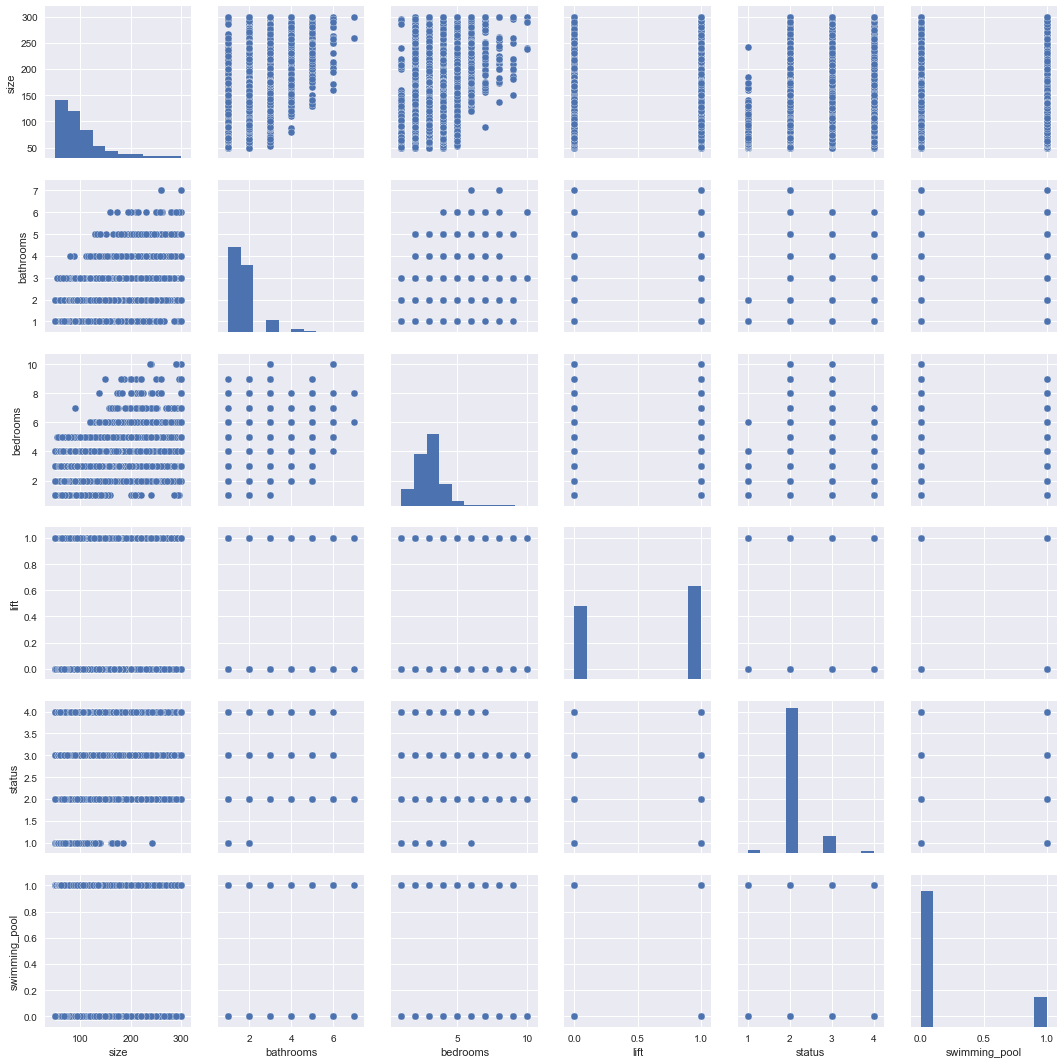

In [21]:
#scatterplot de las columnas más influyentes
sns.set()
cols = ['size', 'bathrooms', 'bedrooms', 'lift', 'status', 'swimming_pool']
sns.pairplot(train[cols], size = 2.5)
plt.show();

## Vamos a analizar ahora los outliers

#### Analizamos la superficie de las viviendas

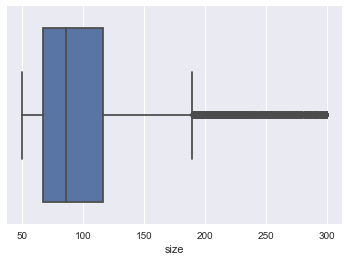

In [22]:
sns.boxplot(x=train['size'])

Con este boxplot vemos que por encima de aprox 175m² estaríamos hablando de outliers.
No obstante, no descartaremos estos valores porque consideramos que deben formar parte de los datos train ya que sí existen inmuebles de ese tipo.

#### Analizamos el unitario (€/m²) de las viviendas

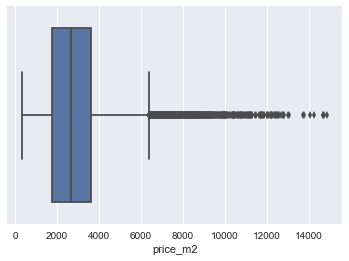

In [23]:
sns.boxplot(x=train['price_m2'])

Se observa que hay valores muy por encima de la "normalidad" (outliers) 
Más que de outliers aquí hablamos de errores porque en la extracción de los datos el volcado de la superficie es incorrecta.
Veremos más adelante como tratar esta información

#### Analizamos el precio de las viviendas

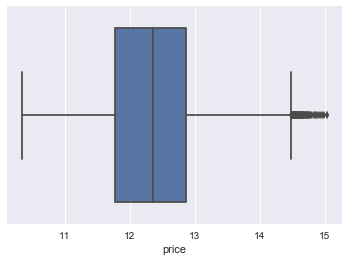

In [24]:
sns.boxplot(x=train['price'])

Después de la conversión en logaritmico vemos que existen outliers por encima del 14,5 aprox. Veremos como tratarlos a continuación.

# Eliminamos outliers

Finalmente decido quitar los outliers porque afectan muy negativamente a la predicción. Son demasiados extremos en algunos casos

In [26]:
#quitamos outliers

train_wout = train [(train['price'] < 14.00) & (train ['size'] < 175.00) & (train ['price_m2'] < 6000.00)]
test_wout = test [(test['price'] < 14.00) & (test ['size'] < 175.00) & (test ['price_m2'] < 6000.00)]

In [27]:
train_wout.shape

(52537, 18)

In [28]:
test_wout.shape

(15175, 18)

## Feature Selection para seleccionar las variables para el modelo. 

Elegimos las variables que inciden más significativamente en el precio

In [52]:
X_train = train_wout[['size', 'bedrooms','bathrooms', 'lift', 'swimming_pool', 'garden', 'sports','status','air_conditioning']]
y_train = train_wout[['price']]

In [53]:
X_test = test[['size', 'bedrooms','bathrooms', 'lift', 'swimming_pool', 'garden', 'sports','status','air_conditioning']]
y_test = test[['price']]

In [54]:
X_train.shape

(52537, 9)

In [55]:
X_test.shape

(17246, 9)

In [56]:
y_train.shape

(52537, 1)

In [57]:
y_test.shape

(17246, 1)

## Desarrollando el modelo

### Validación cruzada

In [58]:
# Evaluamos métricas. CON RMSE
num_folds = 10
scoring = "r2"
# Score para cada algoritmo
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('RFR', RandomForestRegressor()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold,    scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(),   cv_results.std())
    print(msg)

LR: 0.530081 (0.177706)
LASSO: 0.387310 (0.237306)
EN: 0.388854 (0.239744)
KNN: 0.503134 (0.214646)
CART: 0.513317 (0.204433)


C:\Users\Lor\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Lor\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Lor\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Lor\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed whe

RFR: 0.540886 (0.203369)


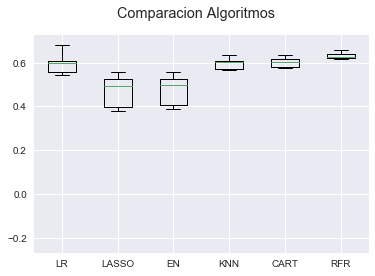

In [59]:
# Comparacion algoritmos
from matplotlib import pyplot

fig = pyplot.figure()
fig.suptitle('Comparacion Algoritmos')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [60]:
# Vamos a utilizar en el RF 1000 árboles
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Entreno el modelo con los datos de train que son anteriores a 2018
rf.fit(X_train, y_train);

C:\Users\Lor\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [61]:
# Ahora hacemos la predicción sobre el X_test que tiene menos datos porque es de 2018 a la actualidad
predictions = rf.predict(X_test)

In [62]:
#resultado de mi predicción con RandomForest
predictions

array([11.5535375 , 11.3873895 , 11.35244943, ..., 12.09203095,
       12.29540214, 12.26807422])

In [40]:
#Convierto la predicción en un dataframe
prediccion=pd.DataFrame(predictions, columns=['prediccion'])
prediccion

,prediccion
0,11.553538
1,11.387390
2,11.352449
3,12.729192
4,13.097192
5,13.107842
6,13.253486
7,13.254452
8,13.398276
9,13.367782


In [63]:
prediccion.shape

(17246, 1)

In [42]:
unido =pd.concat([y_test, prediccion], axis =1, sort = True)
unido

,price,prediccion
0,11.251578,11.553538
1,11.270867,11.387390
2,11.274046,11.352449
3,12.644331,12.729192
4,13.331002,13.097192
5,13.301346,13.107842
6,13.285844,13.253486
7,13.137453,13.254452
8,14.310207,13.398276
9,14.731802,13.367782


In [64]:
mean_absolute_error(y_test, prediccion)


0.35431368416513664

In [65]:
mean_squared_error(y_test, prediccion)  


0.21993784549760054

In [66]:
np.sqrt(metrics.mean_squared_error(y_test, prediccion))

0.4689753143797662

#### Ahora vamos a revertir el logaritmo


In [67]:
#revierto el log
y_prediccion = np.expm1(y_test)
back_prediccion = np.expm1(prediccion)

In [68]:
unido_sinlog =pd.concat([y_prediccion, back_prediccion], axis =1, sort = True)
unido_sinlog ['error'] = unido_sinlog['price']-unido_sinlog['prediccion']
unido_sinlog

,price,prediccion,error
0,77000.30,104143.798678,-2.714350e+04
1,78500.06,88201.404391,-9.701344e+03
2,78750.00,85172.823298,-6.422823e+03
3,310000.00,337455.600646,-2.745560e+04
4,615999.00,487570.401907,1.284286e+05
5,597999.00,492790.563286,1.052084e+05
6,588800.24,570052.617298,1.874762e+04
7,507601.22,570603.643784,-6.300242e+04
8,1640000.00,658865.546275,9.811345e+05
9,2500000.00,639077.387535,1.860923e+06


In [49]:
unido_sinlog.describe()

,price,prediccion,error
count,1.724600e+04,17246.000000,1.724600e+04
mean,3.450175e+05,254930.120742,9.008741e+04
std,3.123056e+05,159030.545894,2.185537e+05
min,4.171074e+04,38556.865494,-4.398096e+05
25%,1.425000e+05,125683.657840,-7.610889e+03
50%,2.460251e+05,210120.833540,3.333668e+04
75%,4.300000e+05,337488.302605,1.307608e+05
max,3.849998e+06,830827.055090,3.207518e+06


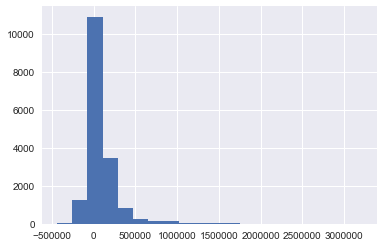

In [69]:
#distribución de mis errores en la predicción
unido_sinlog ['error'].hist(bins = 20)